In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')

In [2]:
def mil_format(x):
    return "${:.1f}M".format(x/1000000)

In [3]:
def k_format(x):
    return "${:.1f}K".format(x/1000)

# Working with Players Data

In [4]:
players_df = pd.read_csv('../data/highest_earning_players.csv')
players = pd.read_csv('../data/highest_earning_players.csv')
players_df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [5]:
# Important to note, all games were play same amount of times (100)
players = players[['CurrentHandle', 'CountryCode', 'TotalUSDPrize', 'Game', 'Genre']]
players.head()

,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [6]:
players['CountryCode'] = players.CountryCode.str.upper()
players.head()

,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [7]:
players.CountryCode.nunique()

56

# Working with Country Data

In [8]:
countries_df = pd.read_csv('../data/country-and-continent-codes-list.csv')
countries = pd.read_csv('../data/country-and-continent-codes-list.csv')
countries_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [9]:
countries = countries[['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code']]
countries.Two_Letter_Country_Code.nunique()

253

## Gotta rename columns for merge

In [10]:
countries = countries.rename(columns={'Continent_Name': 'ContinentName', 'Country_Name': 'CountryName', 'Two_Letter_Country_Code': 'CountryCode'})

In [11]:
countries

,ContinentName,CountryName,CountryCode
0,Asia,"Afghanistan, Islamic Republic of",AF
1,Europe,"Albania, Republic of",AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,"Algeria, People's Democratic Republic of",DZ
4,Oceania,American Samoa,AS
...,...,...,...
257,Africa,"Zambia, Republic of",ZM
258,Oceania,Disputed Territory,XX
259,Asia,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,United Nations Neutral Zone,XD


# Merging

In [12]:
merged_dfs = pd.merge(players, countries, how='inner', on='CountryCode')
merged_dfs.head()

,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,ContinentName,CountryName
0,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,"Denmark, Kingdom of"
1,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,"Denmark, Kingdom of"
2,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,"Denmark, Kingdom of"
3,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,"Denmark, Kingdom of"
4,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,"Denmark, Kingdom of"


In [13]:
merged_dfs['Genre'].unique()

array(['First-Person Shooter', 'Multiplayer Online Battle Arena',
       'Battle Royale', 'Strategy', 'Collectible Card Game'], dtype=object)

In [14]:
colors_genre = ['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue']
colors_genre

['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue']

In [15]:
color_conditions = [
    (merged_dfs['Genre'] == 'Strategy'),
    (merged_dfs['Genre'] == 'Collectible Card Game'),
    (merged_dfs['Genre'] == 'First-Person Shooter'),
    (merged_dfs['Genre'] == 'Battle Royale'),
    (merged_dfs['Genre'] == 'Multiplayer Online Battle Arena')
]

In [16]:
merged_dfs['GenreColor'] = np.select(color_conditions, colors_genre)
merged_dfs.tail()

,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,ContinentName,CountryName,GenreColor
1027,Happy,TH,40376.87,Arena of Valor,Multiplayer Online Battle Arena,Asia,"Thailand, Kingdom of",darkblue
1028,Sky,TH,28083.35,Arena of Valor,Multiplayer Online Battle Arena,Asia,"Thailand, Kingdom of",darkblue
1029,Erl2oR,TH,27074.40,Arena of Valor,Multiplayer Online Battle Arena,Asia,"Thailand, Kingdom of",darkblue
1030,O7T-V1,TH,25941.03,Arena of Valor,Multiplayer Online Battle Arena,Asia,"Thailand, Kingdom of",darkblue
1031,Fenomeno,GR,94073.00,Hearthstone,Collectible Card Game,Europe,"Greece, Hellenic Republic",darkorange


In [20]:
merged_dfs_grouped_count = merged_dfs.groupby('CountryName')['TotalUSDPrize'].count()
merged_dfs_grouped_count = merged_dfs_grouped_count.sort_values(ascending=False).head(10)
merged_dfs_grouped_count

CountryName
Korea, Republic of              251
China, People's Republic of     168
United States of America        114
Sweden, Kingdom of               45
Russian Federation               44
France, French Republic          37
Canada                           37
Denmark, Kingdom of              36
Taiwan                           34
Germany, Federal Republic of     30
Name: TotalUSDPrize, dtype: int64

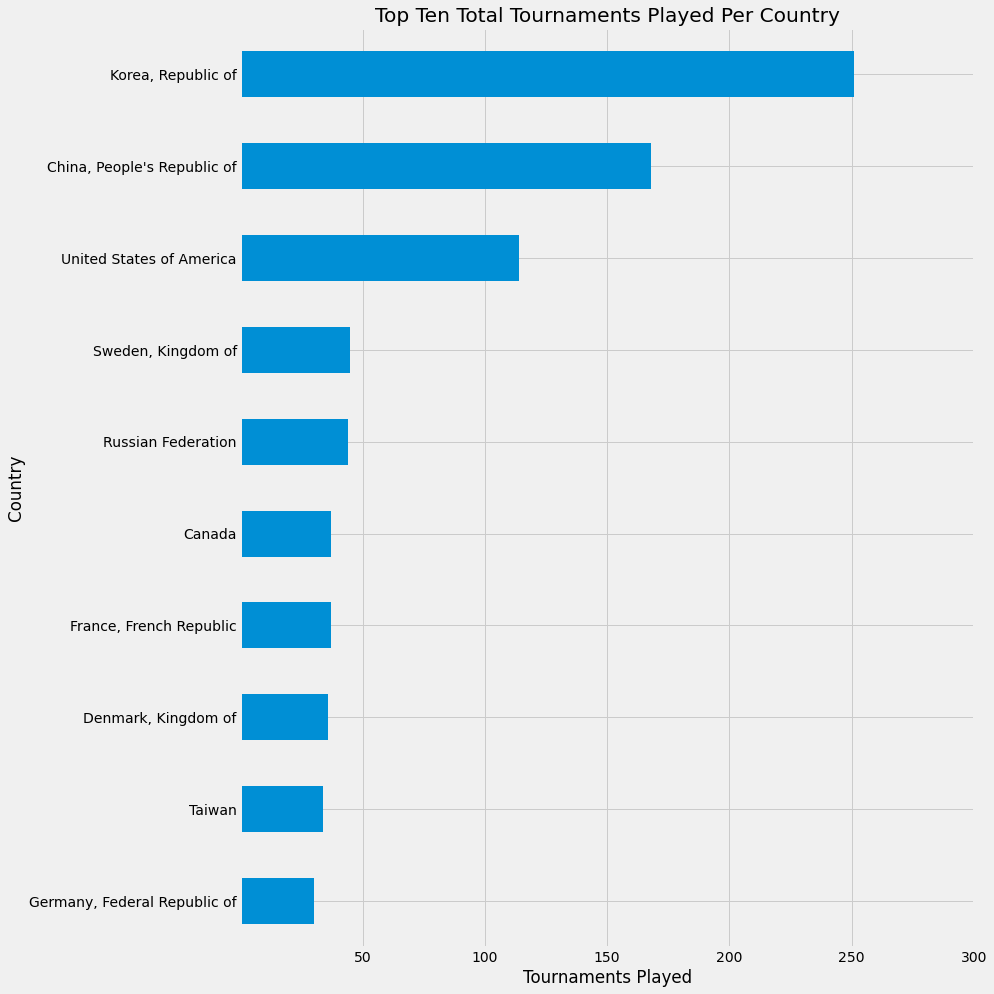

In [21]:
ax = merged_dfs_grouped_count.sort_values(ascending=True).plot.barh()

ax.set_title('Top Ten Total Tournaments Played Per Country')
ax.set_xlabel('Tournaments Played')
ax.set_ylabel('Country')
ax.set_xticks(ticks=[50, 100, 150, 200, 250, 300])
#ax.set_xticklabels(['50','100','150','200'])

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)
#fig.savefig('../images/barh_conrties_tournaments_played.png')

In [22]:
merged_dfs_grouped_sum = merged_dfs.groupby('CountryName')['TotalUSDPrize'].sum()
merged_dfs_grouped_sum = merged_dfs_grouped_sum.sort_values(ascending=False).head(10)
merged_dfs_grouped_sum

CountryName
China, People's Republic of     72391878.56
Korea, Republic of              58441733.71
United States of America        43099381.78
Denmark, Kingdom of             26840800.02
Russian Federation              21645785.42
Sweden, Kingdom of              20770423.01
Finland, Republic of            18876262.25
France, French Republic         15803240.18
Canada                          13483648.61
Germany, Federal Republic of    10143181.56
Name: TotalUSDPrize, dtype: float64

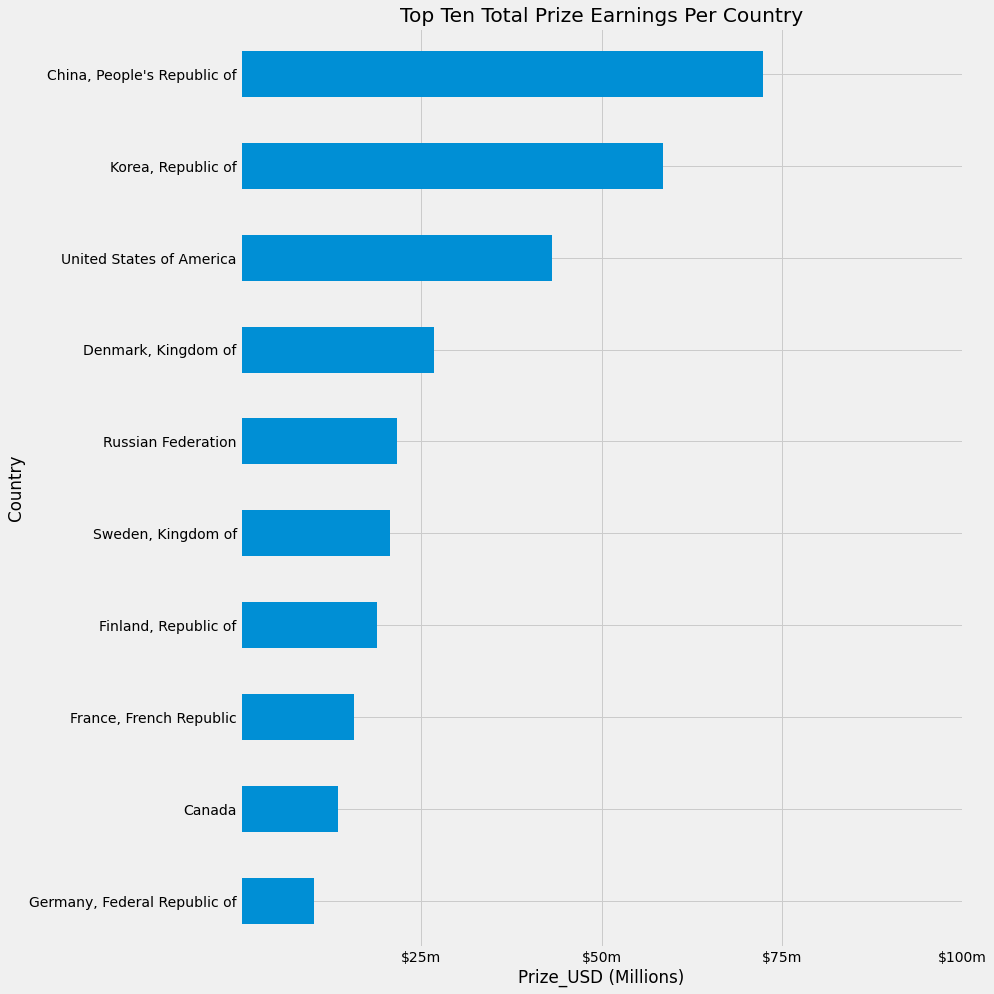

In [23]:
ax = merged_dfs_grouped_sum.sort_values().plot.barh()

ax.set_title('Top Ten Total Prize Earnings Per Country')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Country')
ax.set_xticks(ticks=[25000000, 50000000, 75000000, 100000000])
ax.set_xticklabels(['$25m','$50m','$75m','$100m'])

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)
#fig.savefig('../images/barh_conrties_prize_total.png')

# Groupings

## By Continent

### Creating Continent DF's

In [24]:
asia_df = merged_dfs[merged_dfs['ContinentName'] == 'Asia']

In [25]:
europe_df = merged_dfs[merged_dfs['ContinentName'] == 'Europe']

In [26]:
north_america_df = merged_dfs[merged_dfs['ContinentName'] == 'North America']

In [27]:
oceania_df = merged_dfs[merged_dfs['ContinentName'] == 'Oceania']

In [28]:
south_america_df = merged_dfs[merged_dfs['ContinentName'] == 'South America']

In [29]:
ppp_asia = asia_df['TotalUSDPrize'].sum() / len(asia_df.index)
ppp_asia

331002.7917391304

In [30]:
ppp_europe = europe_df['TotalUSDPrize'].sum() / len(europe_df.index)
ppp_europe

505993.3767637541

In [31]:
ppp_north_america = north_america_df['TotalUSDPrize'].sum() / len(north_america_df.index)
ppp_north_america

372792.5974509804

In [32]:
ppp_oceania = oceania_df['TotalUSDPrize'].sum() / len(oceania_df.index)
ppp_oceania

1599934.952

In [33]:
ppp_south_america = south_america_df['TotalUSDPrize'].sum() / len(south_america_df.index)
ppp_south_america

534747.0184615386

In [34]:
#continent_ppp = {'Asia': ppp_asia,'Europe': ppp_europe,'North America': ppp_north_america,'Oceania': ppp_oceania,'South America': ppp_south_america}
#continent_ppp_df = pd.DataFrame.from_dict(continent_ppp, orient='index')
#continent_ppp_df
continent_ppp = [ppp_asia,ppp_europe,ppp_north_america,ppp_oceania,ppp_south_america]
continent_ppp

[331002.7917391304,
 505993.3767637541,
 372792.5974509804,
 1599934.952,
 534747.0184615386]

## Asia

In [35]:
asia_df_genre = asia_df.groupby('Genre')['TotalUSDPrize'].mean()
asia_df_genre.head()

Genre
Battle Royale                      149066.413939
Collectible Card Game              136738.422051
First-Person Shooter               166003.663409
Multiplayer Online Battle Arena    465272.938403
Strategy                           266696.205915
Name: TotalUSDPrize, dtype: float64

In [36]:
asia_genre_share = asia_df_genre / asia_df_genre.sum()

## Europe

In [37]:
europe_df_genre = europe_df.groupby('Genre')['TotalUSDPrize'].mean()
europe_df_genre.head()

Genre
Battle Royale                      2.868787e+05
Collectible Card Game              1.453690e+05
First-Person Shooter               4.632462e+05
Multiplayer Online Battle Arena    1.037706e+06
Strategy                           2.050141e+05
Name: TotalUSDPrize, dtype: float64

In [38]:
europe_genre_share = europe_df_genre / europe_df_genre.sum()
europe_genre_share

Genre
Battle Royale                      0.134167
Collectible Card Game              0.067986
First-Person Shooter               0.216651
Multiplayer Online Battle Arena    0.485314
Strategy                           0.095881
Name: TotalUSDPrize, dtype: float64

## North America

In [39]:
north_america_genre = north_america_df.groupby('Genre')['TotalUSDPrize'].mean()
north_america_genre.head()

Genre
Battle Royale                      372968.032769
Collectible Card Game              122938.602308
First-Person Shooter               449630.102273
Multiplayer Online Battle Arena    518145.789143
Strategy                           314195.350000
Name: TotalUSDPrize, dtype: float64

In [40]:
north_america_genre_share = north_america_genre / north_america_genre.sum()
north_america_genre_share

Genre
Battle Royale                      0.209783
Collectible Card Game              0.069149
First-Person Shooter               0.252903
Multiplayer Online Battle Arena    0.291441
Strategy                           0.176725
Name: TotalUSDPrize, dtype: float64

## Oceania

In [41]:
oceania_genre = oceania_df.groupby('Genre')['TotalUSDPrize'].mean()
oceania_genre.head()

Genre
Battle Royale                        79049.82
First-Person Shooter                 53759.68
Multiplayer Online Battle Arena    2622288.42
Name: TotalUSDPrize, dtype: float64

In [42]:
oceania_genre_share = oceania_genre / oceania_genre.sum()
oceania_genre_share

Genre
Battle Royale                      0.028692
First-Person Shooter               0.019513
Multiplayer Online Battle Arena    0.951795
Name: TotalUSDPrize, dtype: float64

## South America

In [43]:
south_america_genre = south_america_df.groupby('Genre')['TotalUSDPrize'].mean()
south_america_genre.head()

Genre
Battle Royale            1.021000e+06
Collectible Card Game    7.657962e+04
First-Person Shooter     6.243845e+05
Strategy                 1.580917e+05
Name: TotalUSDPrize, dtype: float64

In [44]:
south_america_genre_share = south_america_genre / south_america_genre.sum()
south_america_genre_share

Genre
Battle Royale            0.543069
Collectible Card Game    0.040733
First-Person Shooter     0.332110
Strategy                 0.084089
Name: TotalUSDPrize, dtype: float64

### Creating Continent Dataframe:

In [45]:
continent_sum = {'Asia': asia_df['TotalUSDPrize'].sum(),'Europe': europe_df['TotalUSDPrize'].sum(),'North America': north_america_df['TotalUSDPrize'].sum(),'Oceania': oceania_df['TotalUSDPrize'].sum(),'South America': south_america_df['TotalUSDPrize'].sum()}
continent_df = pd.DataFrame.from_dict(continent_sum, orient='index')
continent_df

,0
Asia,1.827135e+08
Europe,1.563520e+08
North America,5.703727e+07
Oceania,7.999675e+06
South America,6.951711e+06


In [46]:
continent_df['PrizePerPerson'] = continent_ppp
continent_df

,0,PrizePerPerson
Asia,1.827135e+08,3.310028e+05
Europe,1.563520e+08,5.059934e+05
North America,5.703727e+07,3.727926e+05
Oceania,7.999675e+06,1.599935e+06
South America,6.951711e+06,5.347470e+05


In [47]:
continent_df['TotalPrizeEarnings'] = continent_df[0]
continent_df

,0,PrizePerPerson,TotalPrizeEarnings
Asia,1.827135e+08,3.310028e+05,1.827135e+08
Europe,1.563520e+08,5.059934e+05,1.563520e+08
North America,5.703727e+07,3.727926e+05,5.703727e+07
Oceania,7.999675e+06,1.599935e+06,7.999675e+06
South America,6.951711e+06,5.347470e+05,6.951711e+06


In [48]:
del continent_df[0]

In [49]:
continent_df

,PrizePerPerson,TotalPrizeEarnings
Asia,3.310028e+05,1.827135e+08
Europe,5.059934e+05,1.563520e+08
North America,3.727926e+05,5.703727e+07
Oceania,1.599935e+06,7.999675e+06
South America,5.347470e+05,6.951711e+06


In [50]:
people_per_continent = [552, 309, 153, 5, 13]

In [51]:
continent_df['PeoplePerContinent'] = people_per_continent
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent
Asia,3.310028e+05,1.827135e+08,552
Europe,5.059934e+05,1.563520e+08,309
North America,3.727926e+05,5.703727e+07,153
Oceania,1.599935e+06,7.999675e+06,5
South America,5.347470e+05,6.951711e+06,13


In [52]:
BR_Share = [0.125924, 0.134167, 0.209783, 0.028692, 0.543069]
MOBA_Share = [0.393041, 0.485314, 0.291441, 0.951795, 0]
FPS_Share = [0.140232, 0.216651, 0.252903, 0.019513, 0.33211]
Card_Share = [0.11551, 0.067986, 0.069149, 0, 0.040733]
Strategy_Share = [0.225292, 0.095881, 0.176725, 0, 0.084089]

In [53]:
continent_df['BR_Share'] = BR_Share
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share
Asia,3.310028e+05,1.827135e+08,552,0.125924
Europe,5.059934e+05,1.563520e+08,309,0.134167
North America,3.727926e+05,5.703727e+07,153,0.209783
Oceania,1.599935e+06,7.999675e+06,5,0.028692
South America,5.347470e+05,6.951711e+06,13,0.543069


In [54]:
continent_df['MOBA_Share'] = MOBA_Share
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share
Asia,3.310028e+05,1.827135e+08,552,0.125924,0.393041
Europe,5.059934e+05,1.563520e+08,309,0.134167,0.485314
North America,3.727926e+05,5.703727e+07,153,0.209783,0.291441
Oceania,1.599935e+06,7.999675e+06,5,0.028692,0.951795
South America,5.347470e+05,6.951711e+06,13,0.543069,0.000000


In [55]:
continent_df['FPS_Share'] = FPS_Share
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share
Asia,3.310028e+05,1.827135e+08,552,0.125924,0.393041,0.140232
Europe,5.059934e+05,1.563520e+08,309,0.134167,0.485314,0.216651
North America,3.727926e+05,5.703727e+07,153,0.209783,0.291441,0.252903
Oceania,1.599935e+06,7.999675e+06,5,0.028692,0.951795,0.019513
South America,5.347470e+05,6.951711e+06,13,0.543069,0.000000,0.332110


In [56]:
continent_df['Card_Share'] = Card_Share
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share,Card_Share
Asia,3.310028e+05,1.827135e+08,552,0.125924,0.393041,0.140232,0.115510
Europe,5.059934e+05,1.563520e+08,309,0.134167,0.485314,0.216651,0.067986
North America,3.727926e+05,5.703727e+07,153,0.209783,0.291441,0.252903,0.069149
Oceania,1.599935e+06,7.999675e+06,5,0.028692,0.951795,0.019513,0.000000
South America,5.347470e+05,6.951711e+06,13,0.543069,0.000000,0.332110,0.040733


In [57]:
continent_df['Strategy_Share'] = Strategy_Share
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share,Card_Share,Strategy_Share
Asia,3.310028e+05,1.827135e+08,552,0.125924,0.393041,0.140232,0.115510,0.225292
Europe,5.059934e+05,1.563520e+08,309,0.134167,0.485314,0.216651,0.067986,0.095881
North America,3.727926e+05,5.703727e+07,153,0.209783,0.291441,0.252903,0.069149,0.176725
Oceania,1.599935e+06,7.999675e+06,5,0.028692,0.951795,0.019513,0.000000,0.000000
South America,5.347470e+05,6.951711e+06,13,0.543069,0.000000,0.332110,0.040733,0.084089


[Text(0, 0.5, 'PrizePerPerson'),
 Text(0, 1.5, 'TotalPrizeEarnings'),
 Text(0, 2.5, 'PeoplePerContinent'),
 Text(0, 3.5, 'BR_Share'),
 Text(0, 4.5, 'MOBA_Share'),
 Text(0, 5.5, 'FPS_Share'),
 Text(0, 6.5, 'Card_Share'),
 Text(0, 7.5, 'Strategy_Share')]

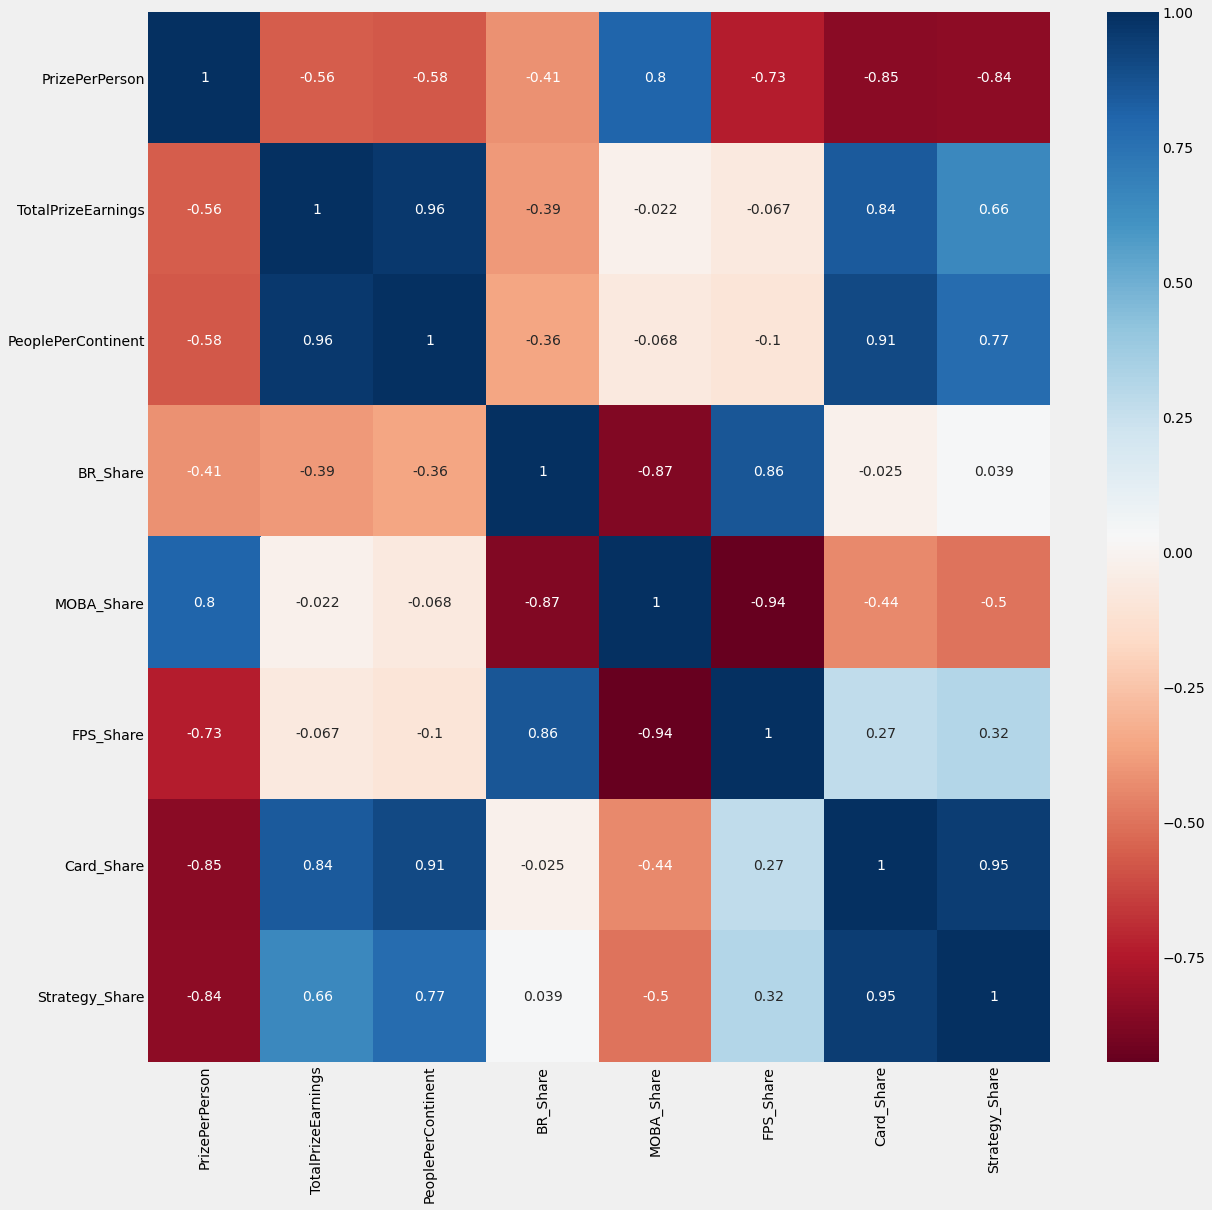

In [58]:
fig, ax = plt.subplots(figsize=(18,18))

sn.heatmap(continent_df.corr(method='pearson'), annot=True, 
            cmap=plt.get_cmap('RdBu'), ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
#plt.savefig('../images/coor_matrix.png', bbox_inches='tight', pad_inches=0.5)

In [187]:
continent_df['PrizePerPerson'] = continent_df['PrizePerPerson'].apply(k_format)
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share,Card_Share,Strategy_Share
Asia,$331.0K,1.827135e+08,552,0.125924,0.393041,0.140232,0.115510,0.225292
Europe,$506.0K,1.563520e+08,309,0.134167,0.485314,0.216651,0.067986,0.095881
North America,$372.8K,5.703727e+07,153,0.209783,0.291441,0.252903,0.069149,0.176725
Oceania,$1599.9K,7.999675e+06,5,0.028692,0.951795,0.019513,0.000000,0.000000
South America,$534.7K,6.951711e+06,13,0.543069,0.000000,0.332110,0.040733,0.084089


In [188]:
continent_df['TotalPrizeEarnings'] = continent_df['TotalPrizeEarnings'].apply(mil_format)
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share,Card_Share,Strategy_Share
Asia,$331.0K,$182.7M,552,0.125924,0.393041,0.140232,0.115510,0.225292
Europe,$506.0K,$156.4M,309,0.134167,0.485314,0.216651,0.067986,0.095881
North America,$372.8K,$57.0M,153,0.209783,0.291441,0.252903,0.069149,0.176725
Oceania,$1599.9K,$8.0M,5,0.028692,0.951795,0.019513,0.000000,0.000000
South America,$534.7K,$7.0M,13,0.543069,0.000000,0.332110,0.040733,0.084089


In [172]:
continent_df

,PrizePerPerson,TotalPrizeEarnings,PeoplePerContinent,BR_Share,MOBA_Share,FPS_Share,Card_Share,Strategy_Share
Asia,$331.0K,$182.7M,552,0.125924,0.393041,0.140232,0.115510,0.225292
Europe,$506.0K,$156.4M,309,0.134167,0.485314,0.216651,0.067986,0.095881
North America,$372.8K,$57.0M,153,0.209783,0.291441,0.252903,0.069149,0.176725
Oceania,$1599.9K,$8.0M,5,0.028692,0.951795,0.019513,0.000000,0.000000
South America,$534.7K,$7.0M,13,0.543069,0.000000,0.332110,0.040733,0.084089


### Prize Earnings:

In [32]:
continent_grouped = merged_dfs.groupby('ContinentName').agg(np.sum)
continent_grouped

,TotalUSDPrize
ContinentName,
Asia,1.827135e+08
Europe,1.563520e+08
North America,5.703727e+07
Oceania,7.999675e+06
South America,6.951711e+06


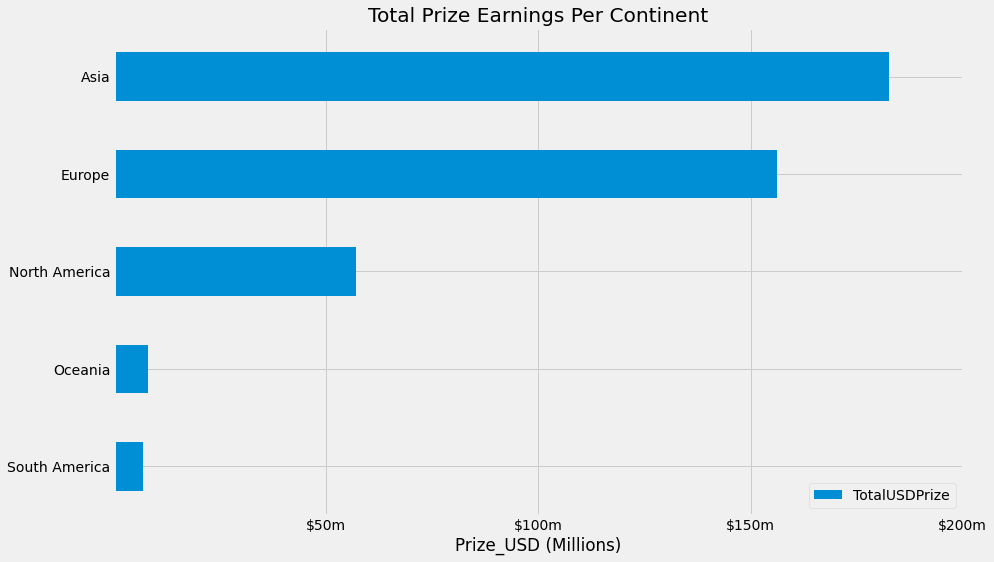

In [45]:
ax = continent_grouped.sort_values(by='TotalUSDPrize').plot.barh()

ax.set_title('Total Prize Earnings Per Continent')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('')
ax.set_xticks(ticks=[50000000, 100000000, 150000000, 200000000])
ax.set_xticklabels(['$50m','$100m','$150m','$200m'])

fig = ax.figure
fig.set_size_inches(14,8)
fig.tight_layout(pad=1)
fig.savefig('../images/barh_continent_total.png')

### Count of Players per Continent:

In [39]:
player_count_continent = merged_dfs.groupby('ContinentName')['CurrentHandle'].count()
player_count_continent.head()

ContinentName
Asia             552
Europe           309
North America    153
Oceania            5
South America     13
Name: CurrentHandle, dtype: int64

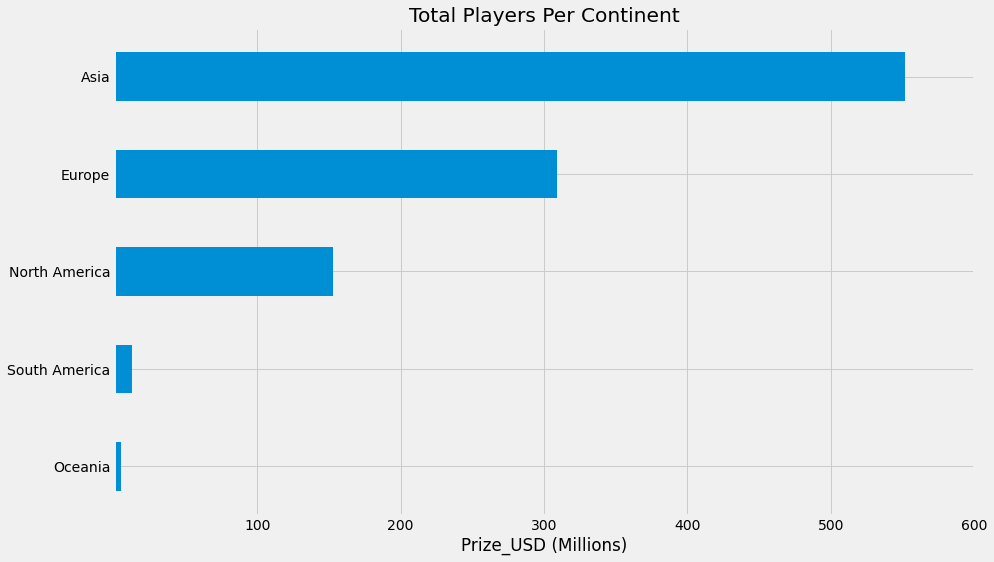

In [46]:
ax = player_count_continent.sort_values().plot.barh()

ax.set_title('Total Players Per Continent')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('')
ax.set_xticks(ticks=[100, 200, 300, 400, 500, 600])
ax.set_xticklabels([100, 200, 300, 400, 500, 600])

fig = ax.figure
fig.set_size_inches(14,8)
fig.tight_layout(pad=1)
fig.savefig('../images/barh_continent_player_count.png')

### Count of Genres by continent

Genre
Battle Royale                      210
Collectible Card Game              105
First-Person Shooter               213
Multiplayer Online Battle Arena    404
Strategy                           100
Name: ContinentName, dtype: int64

In [ ]:
ax = genre_count_continent.sort_values().plot.barh()

ax.set_title('Total Players Per Continent')
ax.set_xlabel('Number of Players')
ax.set_ylabel('')
ax.set_xticks(ticks=[100, 200, 300, 400, 500, 600])
ax.set_xticklabels([100, 200, 300, 400, 500, 600])

fig = ax.figure
fig.set_size_inches(14,8)
fig.tight_layout(pad=1)
fig.savefig('../images/barh_continent_player_count.png')

## By Country

In [ ]:
country_grouped = merged_dfs.groupby('ContinentName').agg(np.sum)
country_grouped